In [1]:
#import our libraries
import pandas as pd
import numpy as np
from sklearn import linear_model

In [38]:
#import the csv files using pandas
data = pd.read_csv("C:\\Users\\MAC\\Downloads\\HR DATA 2(in).csv")
data


employee_id  department     region   education gender  \
0               20   Analytics  region_21  Bachelor's      m   
1               21   Analytics   region_8  Bachelor's      m   
2               29   Analytics   region_7  Bachelor's      m   
3               64   Analytics   region_4  Bachelor's      m   
4               97   Analytics  region_22         NaN      m   
...            ...         ...        ...         ...    ...   
23485        78157  Technology   region_2  Bachelor's      f   
23486        78209  Technology  region_16  Bachelor's      m   
23487        78211  Technology  region_26  Bachelor's      f   
23488        78265  Technology   region_7  Bachelor's      m   
23489        78284  Technology  region_22  Bachelor's      m   

      recruitment_channel  no_of_trainings  age  previous_year_rating  \
0                sourcing                1   27                   NaN   
1                sourcing                2   28                   2.0   
2                   other                1   28                   NaN   
3                   other                1   42                   5.0   
4                   other                1   31                   4.0   
...                   ...              ...  ...                   ...   
23485               other                2   48                   3.0   
23486               other                1   38                   3.0   
23487               other                1   30                   5.0   
23488            sourcing                1   36                   4.0   
23489            referred                1   33                   3.0   

       length_of_service  KPIs_met >80%  awards_won?  avg_training_score  
0                      1              1            0                  89  
1                      3              1            0                  85  
2                      1              1            0                  85  
3                     11              1            0                  80  
4                      2              0            0                  87  
...                  ...            ...          ...                 ...  
23485                 17              0            0                  82  
23486                  4              0            0                  77  
23487                  4              1            0                  81  
23488                  4              0            0                  81  
23489                  5              1            1                  82  

[23490 rows x 13 columns]

In [ ]:
#UNDERSTANDING THE DATASET

In [4]:
#the shape of the dataset
data.shape
#13 columns and 23490 rows

(23490, 13)

In [5]:
data.head()

employee_id department     region   education gender recruitment_channel  \
0           20  Analytics  region_21  Bachelor's      m            sourcing   
1           21  Analytics   region_8  Bachelor's      m            sourcing   
2           29  Analytics   region_7  Bachelor's      m               other   
3           64  Analytics   region_4  Bachelor's      m               other   
4           97  Analytics  region_22         NaN      m               other   

   no_of_trainings  age  previous_year_rating  length_of_service  \
0                1   27                   NaN                  1   
1                2   28                   2.0                  3   
2                1   28                   NaN                  1   
3                1   42                   5.0                 11   
4                1   31                   4.0                  2   

   KPIs_met >80%  awards_won?  avg_training_score  
0              1            0                  89  
1              1            0                  85  
2              1            0                  85  
3              1            0                  80  
4              0            0                  87

In [6]:
data.tail()

employee_id  department     region   education gender  \
23485        78157  Technology   region_2  Bachelor's      f   
23486        78209  Technology  region_16  Bachelor's      m   
23487        78211  Technology  region_26  Bachelor's      f   
23488        78265  Technology   region_7  Bachelor's      m   
23489        78284  Technology  region_22  Bachelor's      m   

      recruitment_channel  no_of_trainings  age  previous_year_rating  \
23485               other                2   48                   3.0   
23486               other                1   38                   3.0   
23487               other                1   30                   5.0   
23488            sourcing                1   36                   4.0   
23489            referred                1   33                   3.0   

       length_of_service  KPIs_met >80%  awards_won?  avg_training_score  
23485                 17              0            0                  82  
23486                  4              0            0                  77  
23487                  4              1            0                  81  
23488                  4              0            0                  81  
23489                  5              1            1                  82

In [7]:
#descritive statistics for numerical columns
data.describe()

employee_id  no_of_trainings           age  previous_year_rating  \
count  23490.000000     23490.000000  23490.000000          21678.000000   
mean   39041.399149         1.254236     34.782929              3.339146   
std    22640.809201         0.600910      7.679492              1.263294   
min        3.000000         1.000000     20.000000              1.000000   
25%    19370.250000         1.000000     29.000000              3.000000   
50%    38963.500000         1.000000     33.000000              3.000000   
75%    58690.000000         1.000000     39.000000              4.000000   
max    78295.000000         9.000000     60.000000              5.000000   

       length_of_service  KPIs_met >80%   awards_won?  avg_training_score  
count       23490.000000   23490.000000  23490.000000        23490.000000  
mean            5.810387       0.358834      0.022776           63.263133  
std             4.207917       0.479668      0.149191           13.411750  
min             1.000000       0.000000      0.000000           39.000000  
25%             3.000000       0.000000      0.000000           51.000000  
50%             5.000000       0.000000      0.000000           60.000000  
75%             7.000000       1.000000      0.000000           76.000000  
max            34.000000       1.000000      1.000000           99.000000

In [ ]:
#OBSERVATIONS :1 average [age of employees(34),previous_year_rating(3.3),length of service(5.8years),KPIs(0.3),training_score(63)
#             :2 minimum[age of employees(20),length of service(1)
#             :3 maximum[age of employees(60),previous_year_rating(5),length of service(34years),KPIs(1),training_score(99)  

In [ ]:
#descritive statistics for categorical columns

In [8]:
data.describe(include = 'object')

department    region   education gender recruitment_channel
count               23490     23490       22456  23490               23490
unique                  9        34           3      2                   3
top     Sales & Marketing  region_2  Bachelor's      m               other
freq                 7315      5299       15578  16596               13078

In [ ]:
#OBSERVATION  :1 unique[9 unique departments,34 unique regions,3 education standards,2 gender,3 recruiment channel]
#             :2 top[sales & marketing as the top department,region_2,most employee has bachelors degree,more males,top recruiment channel(other)

In [9]:
#datatype of the dataset
data.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
dtype: object

In [11]:
data.nunique()

employee_id             23490
department                  9
region                     34
education                   3
gender                      2
recruitment_channel         3
no_of_trainings             9
age                        41
previous_year_rating        5
length_of_service          34
KPIs_met >80%               2
awards_won?                 2
avg_training_score         61
dtype: int64

In [ ]:
#CLEANING THE DATASET

In [12]:
#removing null values
data.isnull().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [18]:
#checking for the cause of the missing value(checking for pattern|relationship)
data[data['previous_year_rating'].isnull()]


employee_id  department     region   education gender  \
0               20   Analytics  region_21  Bachelor's      m   
2               29   Analytics   region_7  Bachelor's      m   
35            1113   Analytics  region_20  Bachelor's      m   
41            1206   Analytics   region_9         NaN      m   
42            1242   Analytics  region_34  Bachelor's      m   
...            ...         ...        ...         ...    ...   
23468        77743  Technology   region_7  Bachelor's      m   
23475        77897  Technology  region_33  Bachelor's      f   
23476        77903  Technology  region_24  Bachelor's      m   
23480        78042  Technology  region_22  Bachelor's      m   
23484        78142  Technology   region_5  Bachelor's      f   

      recruitment_channel  no_of_trainings  age  previous_year_rating  \
0                sourcing                1   27                   NaN   
2                   other                1   28                   NaN   
35                  other                2   30                   NaN   
41                  other                1   28                   NaN   
42                  other                2   27                   NaN   
...                   ...              ...  ...                   ...   
23468               other                2   27                   NaN   
23475               other                2   27                   NaN   
23476               other                1   27                   NaN   
23480               other                3   27                   NaN   
23484               other                1   27                   NaN   

       length_of_service  KPIs_met >80%  awards_won?  avg_training_score  
0                      1              1            0                  89  
2                      1              1            0                  85  
35                     1              0            0                  85  
41                     1              0            0                  82  
42                     1              0            0                  83  
...                  ...            ...          ...                 ...  
23468                  1              0            0                  76  
23475                  1              0            0                  77  
23476                  1              0            0                  82  
23480                  1              1            0                  75  
23484                  1              0            0                  78  

[1812 rows x 13 columns]

In [ ]:
#OBSERVATIONS : all the rows with missing values in column(previous_year_ratings) have a length of service =1
#this means that employees with 1 year of service has missing values for previous_year_rating because they were
#not in the company the previous year;hence replaced with 0

In [39]:
#filing the missing values in previous year rating
data['previous_year_rating']=data['previous_year_rating'].fillna(0)
data['previous_year_rating']

0        0.0
1        2.0
2        0.0
3        5.0
4        4.0
        ... 
23485    3.0
23486    3.0
23487    5.0
23488    4.0
23489    3.0
Name: previous_year_rating, Length: 23490, dtype: float64

In [40]:
#checking for pattern in education column
data[data['education'].isnull()]

employee_id  department     region education gender  \
4               97   Analytics  region_22       NaN      m   
9              178   Analytics  region_26       NaN      m   
20             700   Analytics  region_22       NaN      m   
41            1206   Analytics   region_9       NaN      m   
45            1346   Analytics   region_2       NaN      m   
...            ...         ...        ...       ...    ...   
23114        68297  Technology   region_2       NaN      m   
23146        69155  Technology   region_2       NaN      f   
23153        69352  Technology   region_2       NaN      f   
23214        70928  Technology  region_31       NaN      f   
23462        77642  Technology   region_2       NaN      m   

      recruitment_channel  no_of_trainings  age  previous_year_rating  \
4                   other                1   31                   4.0   
9                sourcing                1   27                   4.0   
20                  other                1   33                   3.0   
41                  other                1   28                   0.0   
45                  other                1   43                   3.0   
...                   ...              ...  ...                   ...   
23114               other                1   32                   3.0   
23146               other                1   50                   1.0   
23153            sourcing                1   35                   5.0   
23214               other                1   27                   1.0   
23462            sourcing                1   35                   1.0   

       length_of_service  KPIs_met >80%  awards_won?  avg_training_score  
4                      2              0            0                  87  
9                      4              0            0                  86  
20                    10              1            0                  87  
41                     1              0            0                  82  
45                    13              0            0                  85  
...                  ...            ...          ...                 ...  
23114                  8              0            0                  79  
23146                  9              0            0                  77  
23153                  9              1            0                  80  
23214                  2              0            0                  83  
23462                  9              0            0                  79  

[1034 rows x 13 columns]

In [44]:
#hence no pattern was found in education column and since it is a categorical variable we will be replacing all null values with the mode
data['education'].fillna(data['education'].mode()[0],inplace=True)
data['education']

0        Bachelor's
1        Bachelor's
2        Bachelor's
3        Bachelor's
4        Bachelor's
            ...    
23485    Bachelor's
23486    Bachelor's
23487    Bachelor's
23488    Bachelor's
23489    Bachelor's
Name: education, Length: 23490, dtype: object

In [42]:
#check if the null values are still present
data.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64

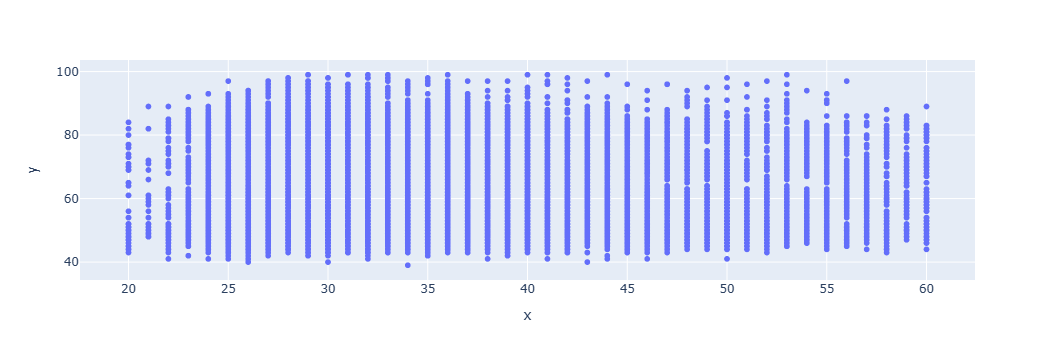

In [43]:
#checking for outliers(numerical variables)
import plotly.express as px
fig = px.scatter(x=data['age'],y=data['avg_training_score'])
fig.show()

In [ ]:
#OBSERVATION : from age 25 to 53 tends to make an average training score of 94 and above;hence age is a determinant factor 

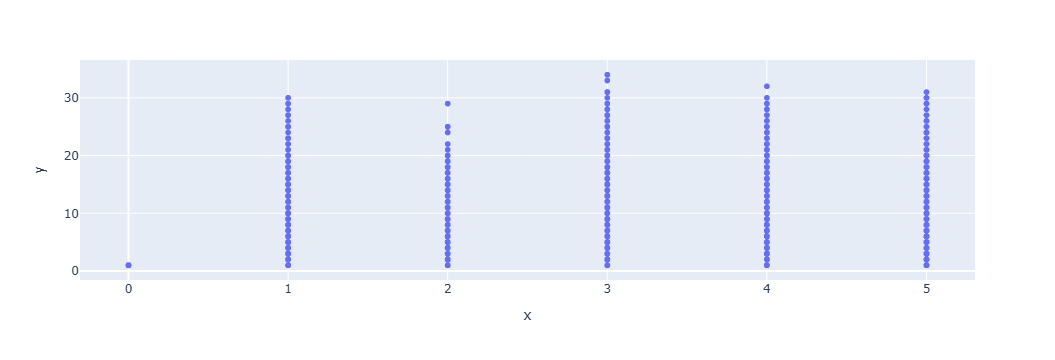

In [48]:
fig = px.scatter(x=data['previous_year_rating'],y=data['length_of_service'])
fig.show()

In [ ]:
#OBSERVATIONS : employees with 3-5 previous year rating tend to stay longer in the firm 

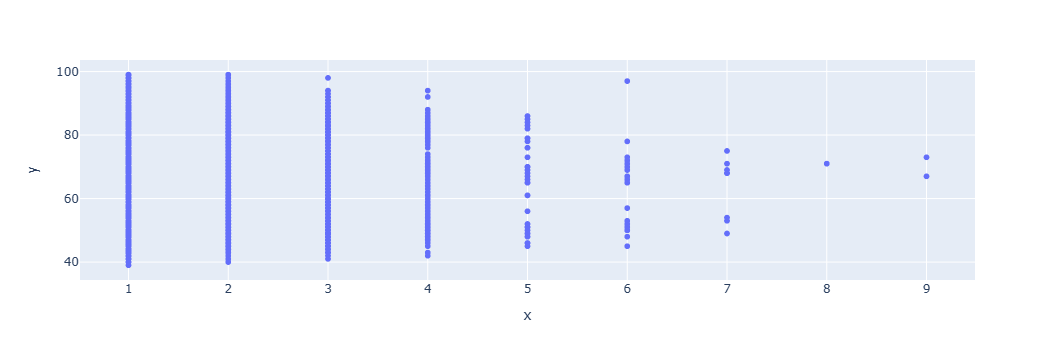

In [51]:
fig = px.scatter(x=data['no_of_trainings'],y=data['avg_training_score'])
fig.show()

In [ ]:
#OBSERVATIONS : employees with less number of trainings get high average training score

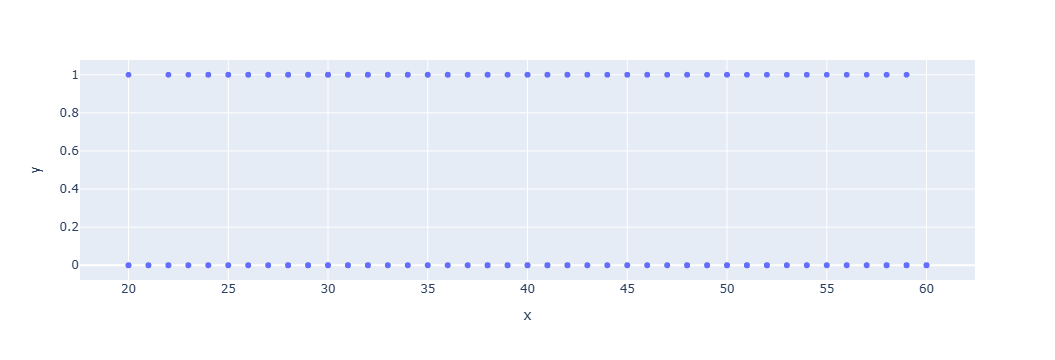

In [54]:
#QUESTIONS
#relationship between age and awards_won
fig = px.scatter(x=data['age'],y=data['awards_won?'])
fig.show()

In [ ]:
#Answer : awards are evenly distributed regardless the age : fair system

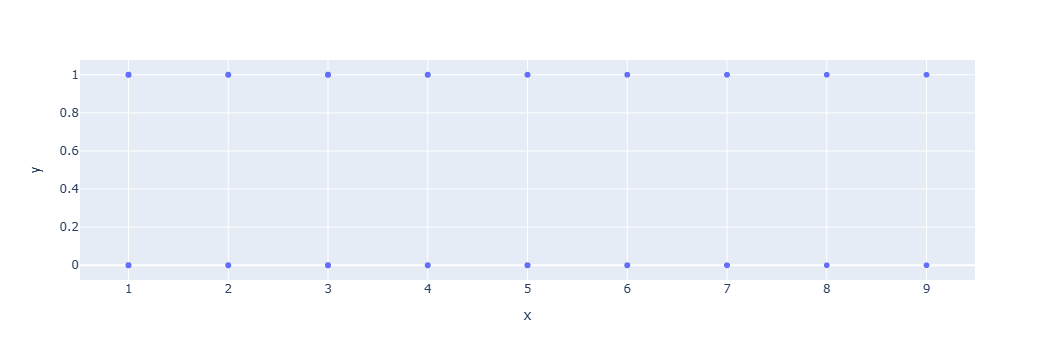

In [61]:
#is there a relationship between the number of trainings and KPIs met(>80%)
fig = px.scatter(x=data['no_of_trainings'],y=data['KPIs_met >80%'])
fig.show()

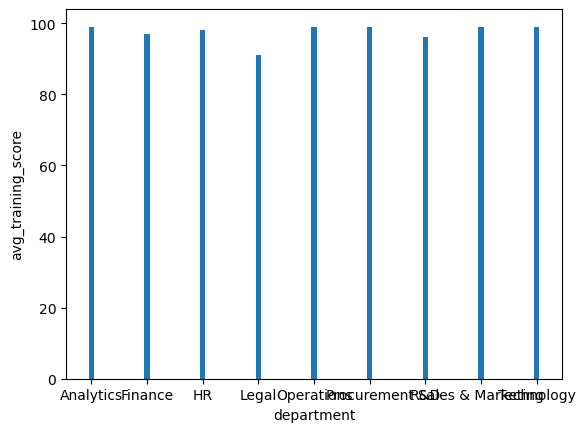

In [12]:
#how does the average training score vary across departments?
import matplotlib.pyplot as plt
plt.bar(data['department'],data['avg_training_score'],width=0.1)
plt.xlabel('department')
plt.ylabel('avg_training_score')
plt.show()

In [ ]:
#ANSWER : no obvious difference except that the legal department has the lowest average score

In [ ]:
#what is the gender distribution across departments and regions

In [ ]:
fig = plt.subplots(figsize=(15, 10))
bar1 =np.arrange(len)

In [ ]:
#how does education vary by department or recruitment channel

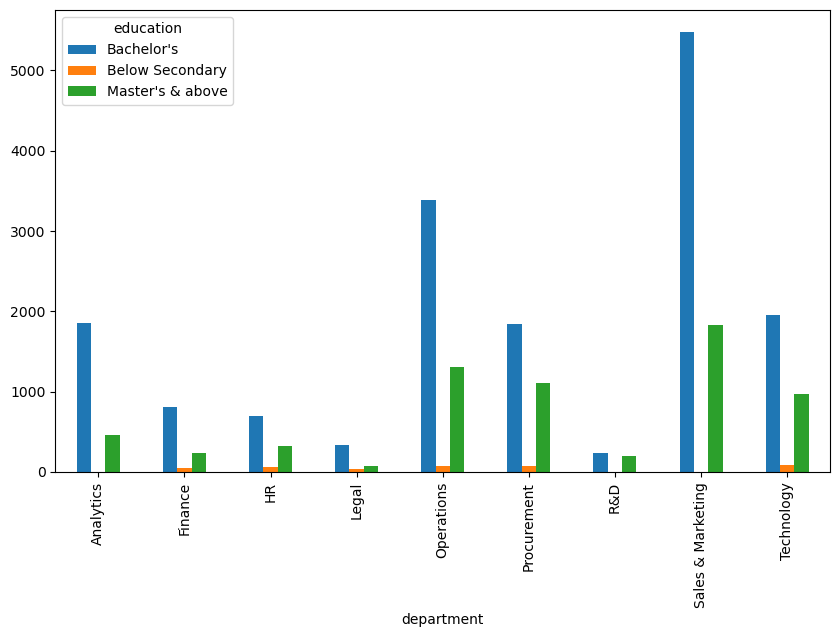

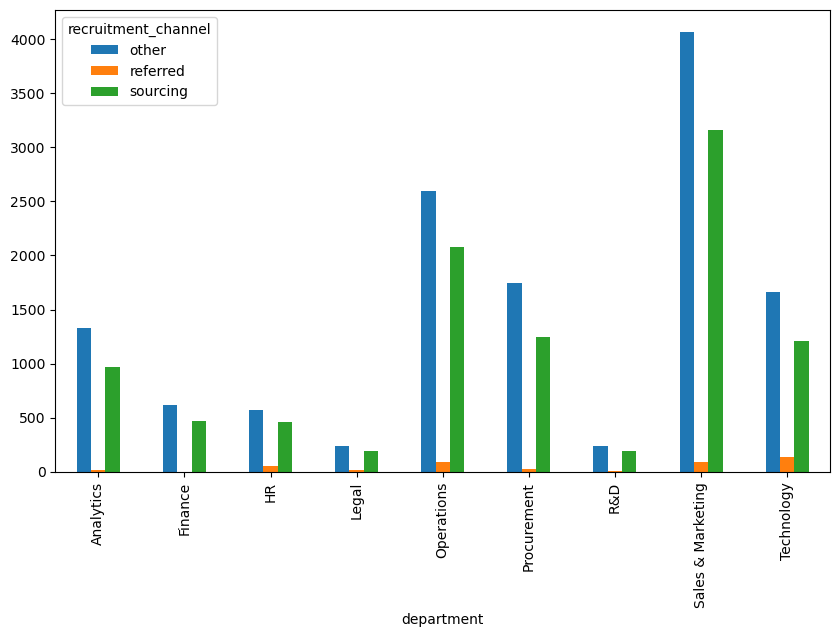

In [44]:
plt = data.groupby(['education','department'])['education'].count().unstack(0).plot.bar(figsize =(10,6))
plt = data.groupby(['recruitment_channel','department'])['recruitment_channel'].count().unstack(0).plot.bar(figsize =(10,6))

In [20]:
data.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score'],
      dtype='object')

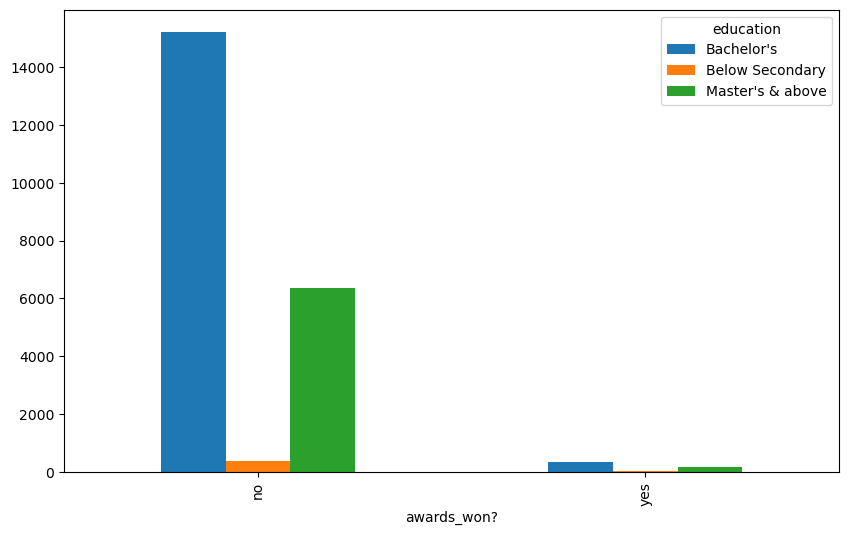

In [4]:
#what variables determine whether an award is won or not
#first converting column(awards won?) column to yes or no
data['awards_won?'].replace((1,0),('yes','no'), inplace=True)
plt = data.groupby(['education','awards_won?'])['education'].count().unstack(0).plot.bar(figsize =(10,6))

In [ ]:
#OBSERVATION: education is a determinant because below secondary tends to win less awards,bachelors win more awards

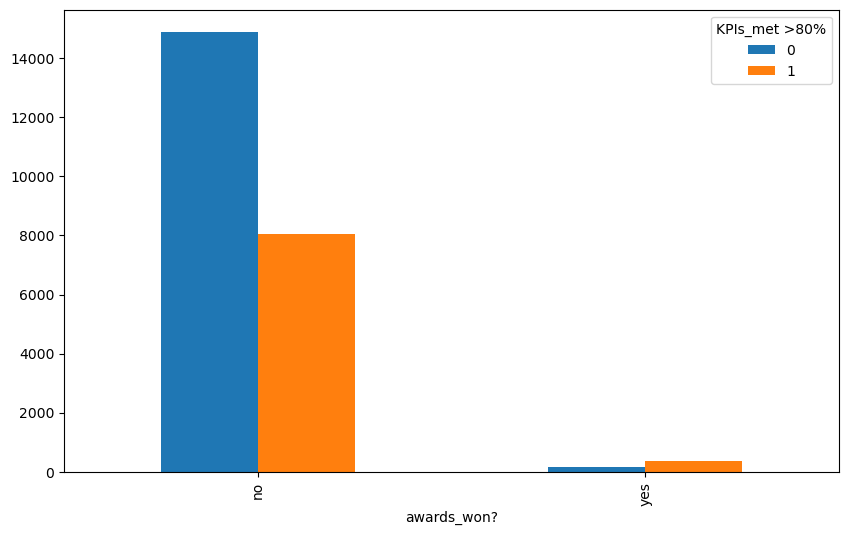

In [7]:
data['awards_won?'].replace((1,0),('yes','no'), inplace=True)
plt = data.groupby(['KPIs_met >80%','awards_won?'])['KPIs_met >80%'].count().unstack(0).plot.bar(figsize =(10,6))

In [ ]:
#employees with KPIs>80% tends to win more awards

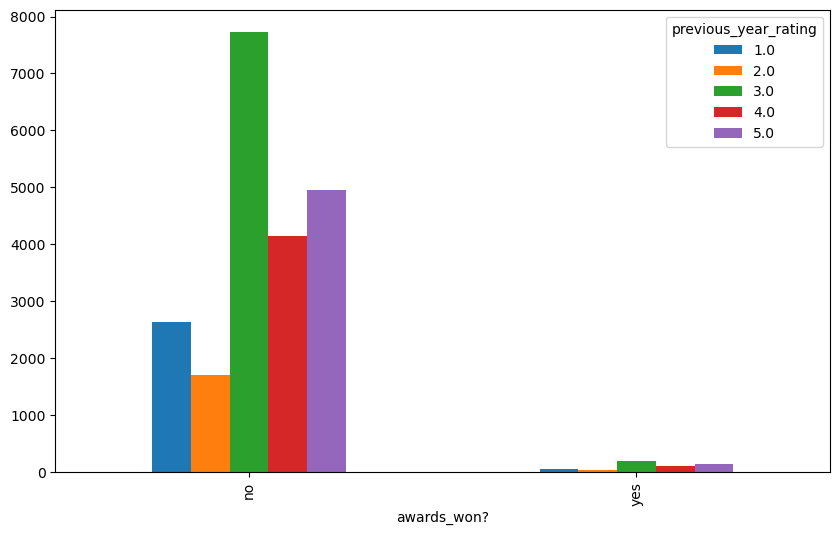

In [9]:
data['awards_won?'].replace((0,1),('no','yes'), inplace=True)
plt = data.groupby(['previous_year_rating','awards_won?'])['previous_year_rating'].count().unstack(0).plot.bar(figsize =(10,6))

In [ ]:
#employees with 3-5 previous year rating tends to win more awards

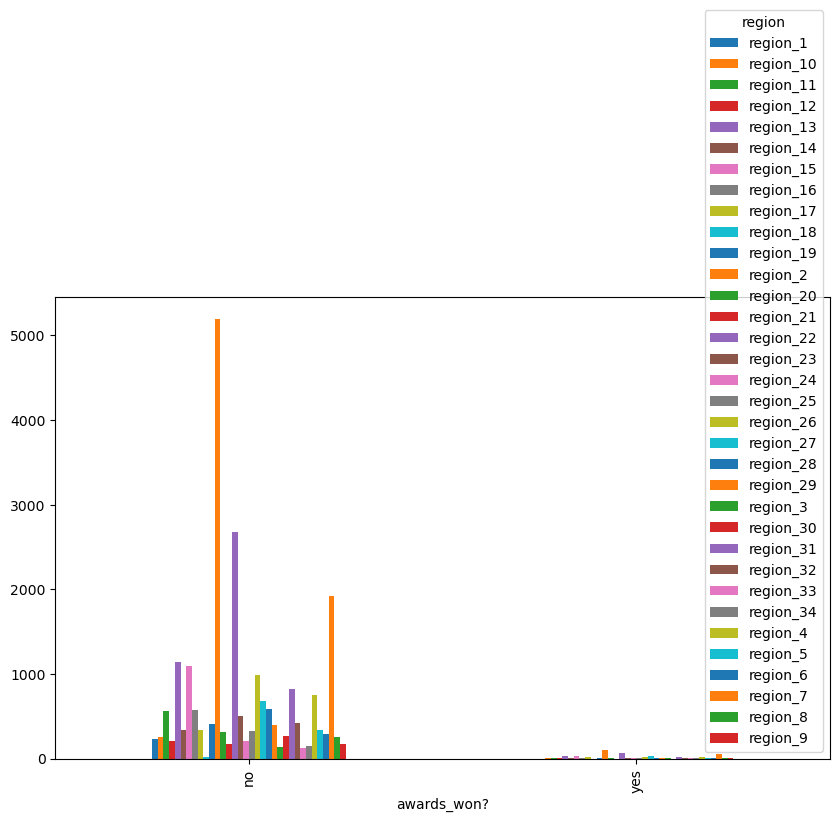

In [10]:
data['awards_won?'].replace((1,0),('yes','no'), inplace=True)
plt = data.groupby(['region','awards_won?'])['region'].count().unstack(0).plot.bar(figsize =(10,6))

In [ ]:
#eemployees from region 2 tends to win more awards

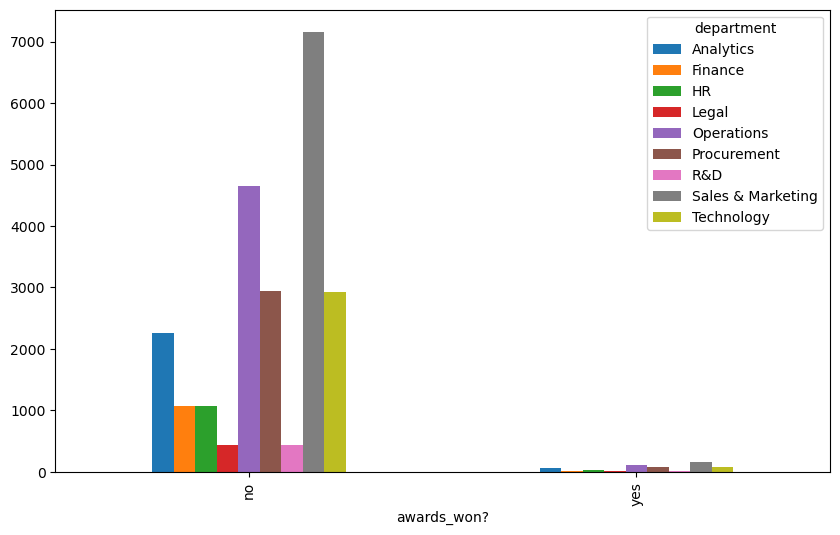

In [16]:
data['awards_won?'].replace((1,0),('yes','no'), inplace=True)
plt = data.groupby(['department','awards_won?'])['department'].count().unstack(0).plot.bar(figsize =(10,6))

In [ ]:
#sales and marketing department tends to win more awards

In [ ]:
#What is the best criteria for employing award winning employees
the best method for employing award winning employees is to employ more workers with bachelors degree 
and above through other recruitment channel within region 2 who met KPIs of 80% and above 

In [ ]:
#which recruitment channel yields the highest performing employees
other

In [2]:

sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic

SyntaxError: invalid syntax (4086125774.py, line 1)